# Cassava Leaf Disease Classification

## Importing Libraries

In [17]:
import os
import json
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Downloading the data

I have downloaded the data and saved it in my google drive.

In [ ]:
# !pip uninstall kaggle -y --quiet
# !pip install kaggle --quiet
# !mkdir -p ~/.kaggle
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# !kaggle competitions download -c cassava-leaf-disease-classification
# !unzip '/content/cassava-leaf-disease-classification.zip' -d '/content/drive/MyDrive/Projects/Casava_Leaf_Disease_Classification/input'

In [7]:
INPUT_PATH = '/content/drive/MyDrive/Projects/Casava_Leaf_Disease_Classification/input'

os.listdir(INPUT_PATH)

['label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'test_tfrecords',
 'train.csv',
 'train_images',
 'train_tfrecords']

## Looking at the data

In [8]:
df = pd.read_csv(INPUT_PATH + '/train.csv')
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [10]:
with open(os.path.join(INPUT_PATH, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    map_classes = {int(k) : v for k, v in map_classes.items()}

In [11]:
map_classes

{0: 'Cassava Bacterial Blight (CBB)',
 1: 'Cassava Brown Streak Disease (CBSD)',
 2: 'Cassava Green Mottle (CGM)',
 3: 'Cassava Mosaic Disease (CMD)',
 4: 'Healthy'}

In [14]:
df['classes'] = df['label'].map(map_classes)
df.head()

,image_id,label,classes
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)


In [15]:
print("Total Length of dataset: ", len(df))

Total Length of dataset:  21397


In [31]:
print(df['label'].nunique())

5


### Observations:


*   We have total 21397 labeled images
*   The labels are divided in 5 categories



## Looking at the distribution of the labels

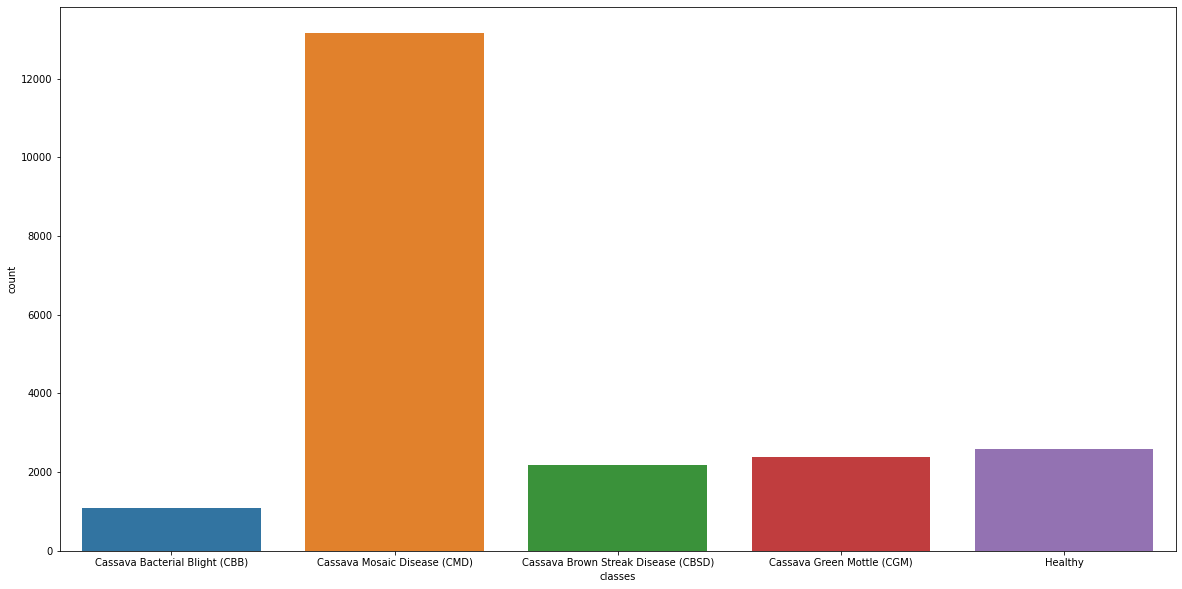

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['classes'])

In [22]:
df['classes'].value_counts()

Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: classes, dtype: int64

### Observations:
There is a huge class imbalance in the dataset and hence we should choose ROC as a metric. Also we will perform stratified train and test split. We could perform stratified K-fold splits but due to computational cost we will perform single stratified split.

## Looking at images

In [29]:
classes = df['classes'].unique()
samples = []

for i in classes:
  samples.append(df[df['classes'] == i].sample(4)['image_id'].values)


In [30]:
IMAGE_PATH = INPUT_PATH + '/train_images/'

plt.figure(figsize=(20,20))
counter = 1
for image_ids, name in zip(samples, classes):
  for image_id in image_ids:
    plt.subplot(5, 4, counter)
    plt.imshow(plt.imread(IMAGE_PATH + '/' + image_id))
    plt.axis('off')
    plt.title(name)
    counter += 1

Output hidden; open in https://colab.research.google.com to view.

### Observations:
It is not very easy to classify these images as we can already see its hard even from a human perspective.
Also as the featues in the images have very slight variations unlike the dog and cat classification and hence we will use augmentation to increase out training samples.